In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

# Schelling's segregation model
# https://en.wikipedia.org/wiki/Schelling%27s_model_of_segregation

In [129]:
# function to create the board
def create_board(N):
    board = np.random.choice([1,0,-1], N*N, p=[1/3,1/3,1/3]).reshape(N,N)
    return board

# function to update the board
def update_board(board, N, threshold):
    # create a copy of the board
    new_board = board.copy()
    # we update the board 1 random cell at a time and return the new board
    # select a random cell
    i = np.random.randint(N)
    j = np.random.randint(N)
    # if the cell is empty, select another cell
    while board[i,j] == 0:
        i = np.random.randint(N)
        j = np.random.randint(N)
    # if the cell is occupied, check how many non-empty neighbors it has (edge cases don't count)
    non_empty_n = np.sum(board[max(0,i-1):min(N,i+2), max(0,j-1):min(N,j+2)] != 0) - 1 # -1 to remove the cell itself, max(0, i-1) to avoid negative indices when i = 0
    # get cell type
    cell_type = board[i,j]
    # get the number of like neighbors
    like_n = np.sum(board[max(0,i-1):min(N,i+2), max(0,j-1):min(N,j+2)] == cell_type) - 1
    # create f
    f = like_n / non_empty_n
    # print(f)
    # if f < threshold, move the cell to a random empty cell
    if f < threshold:
        # find all empty cells
        empty_cells = np.argwhere(board == 0) # argwhere returns the indices of the elements equal to 0 in this case (list of indices)
        # select a random empty cell
        empty_cell = empty_cells[np.random.randint(len(empty_cells))] # select a random empty cell
        # move the cell to the empty cell
        new_board[empty_cell[0], empty_cell[1]] = cell_type # move the cell
        new_board[i,j] = 0 # remove the cell from its original position
    # return the new board
    return new_board

# function to plot the board
def plot_board(board, N, threshold):
    # create a figure
    fig = plt.figure()
    # create an axis
    ax = fig.add_subplot(111)
    # plot the board
    ax.imshow(board, cmap='bwr', vmin=-1, vmax=1)
    # set the title
    ax.set_title('Schelling\'s segregation model (threshold = {})'.format(threshold))
    # remove the axis
    ax.axis('off')
    # show the plot
    plt.show()

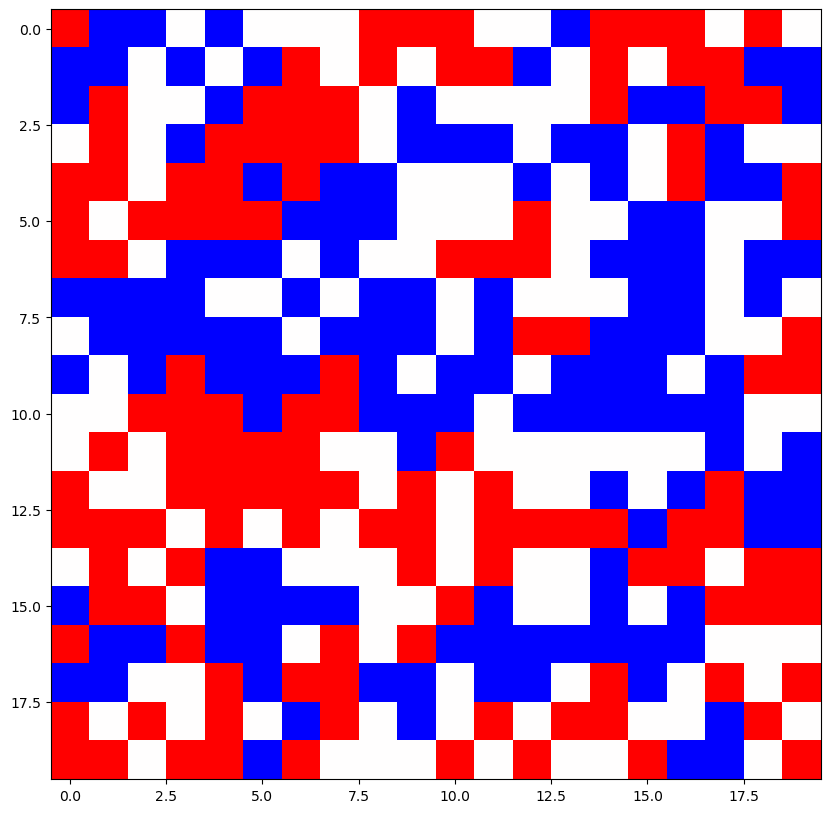

In [132]:
SIZE = 20
THRESH = 1/3
board = create_board(SIZE)
board_list = []
for i in range(1000):
    board_list.append(board)
    board = update_board(board, SIZE, THRESH)

fig, ax = plt.subplots()
# change size of figure
fig.set_size_inches(10, 10)
im = ax.imshow(board_list[0], interpolation='nearest')
# change colors to red and blue
im.set_cmap('bwr')

def animate_func(i):
    im.set_array(board_list[i])
    return [im]

animation = anim.FuncAnimation(fig, animate_func, frames=len(board_list), interval=10, blit=True)
animation.save('segreg_cell_1.mp4', fps=30)